# ANOVA Analysis on Diamond Dataset

This Jupyter notebook aims to explore the differences among various groups within the 'diamonds' dataset using ANOVA (Analysis of Variance). This statistical method helps in understanding how different factors like diamond color and cut influence diamond prices. 

This notebook is designed for individuals looking to understand basic to advanced statistical analysis in Python.

## Background
The 'diamonds' dataset contains price and other attributes of approximately 54,000 diamonds. It is an excellent dataset for demonstrating ANOVA because it contains both categorical variables (such as color and cut) and continuous variables (like price).

### Source
Data sourced from seaborn library, simulated representation of market data.


### Objective and Applicability 
This notebook demonstrates an advanced statistical analysis using ANOVA (Analysis of Variance) to explore the impact of categorical variables—specifically, the color and cut of diamonds—on their price. By understanding these influences, this analysis aids in strategic decision-making for businesses involved in the trading, valuation, or marketing of diamonds.

Practical Applications
Strategic Pricing: ANOVA helps identify which factors (color, cut) significantly impact diamond prices. Businesses can use this information to strategically price their products based on these attributes to maximize profit.

Inventory Management: By understanding the price variability associated with different cuts and colors, retailers can better manage their inventory by stocking products that are more likely to sell at higher prices.

Marketing and Promotions: Insight into which attributes (color and cut) significantly affect price can guide targeted marketing campaigns. For instance, if certain colors or cuts are found to significantly enhance a diamond's value, marketing efforts can be tailored to highlight these premium features to potential customers.

Customer Segmentation: The interaction effect between color and cut on price can help businesses understand consumer preferences in more depth. This knowledge can be used to segment customers based on their likely preferences for specific combinations of color and cut, enabling more personalized marketing and sales strategies.

## Setup and Data Preparation
In this section, we load necessary Python libraries and prepare the data by selecting relevant subsets and transforming variables to meet the requirements of ANOVA tests.

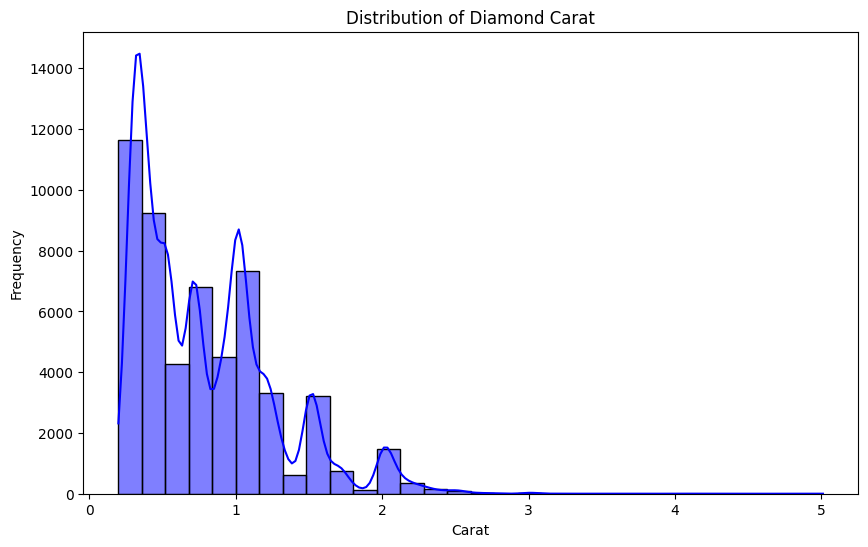

/var/folders/8w/f42_5r353h7088r0jtj1y92m0000gn/T/ipykernel_43124/3906563877.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=diamonds, palette='viridis')


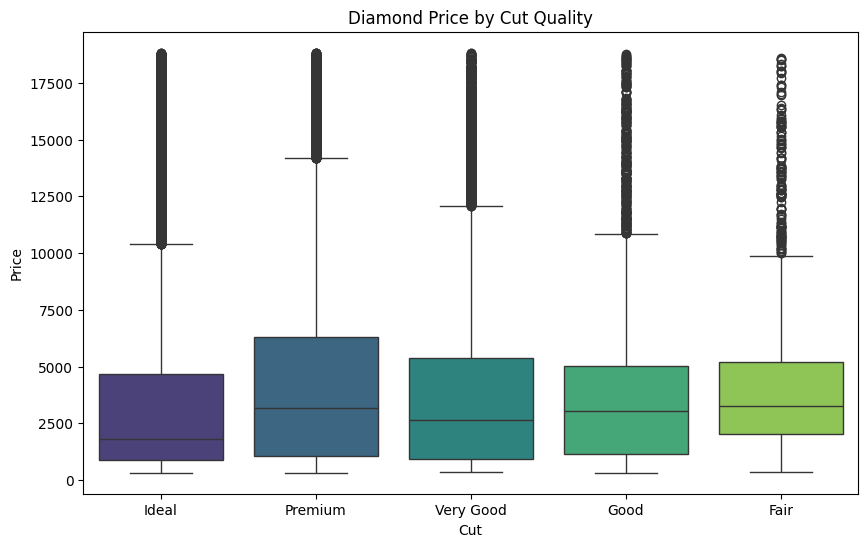

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Manage Warning in you python script
import warnings

# Suppress all UserWarnings
warnings.filterwarnings('ignore', category=UserWarning)

# Alternatively, suppress only specific messages by part of their message text
warnings.filterwarnings('ignore', message='covariance of constraints does')

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Exploratory Data Analysis (EDA) with customized color palette
# Distribution of carat with a custom color
sns.set_palette("coolwarm")  # Set the color palette
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['carat'], color='blue', bins=30, kde=True)
plt.title('Distribution of Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

# Boxplot of price by cut quality with a custom color palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds, palette='viridis')
plt.title('Diamond Price by Cut Quality')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()



In [15]:
# ANOVA: Analyzing the effect of color and cut on log price without any selection of color and cut.
# We use log price for a more normal distribution of prices, with no feature selection..

diamonds['log_price'] = np.log(diamonds['price'])
model = ols('log_price ~ C(color) + C(cut) + C(color):C(cut)', data=diamonds).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                       sum_sq       df           F         PR(>F)
C(color)          1325.991186      6.0  224.341769  4.300381e-284
C(cut)             901.918331      4.0  228.890609  3.250547e-195
C(color):C(cut)     96.058742     24.0    4.062996   8.168980e-11
Residual         53101.684443  53905.0         NaN            NaN


### ANOVA with Feature Engineering

This approach employs a modular design, utilizing distinct functions for each phase of the analysis process to improve readability, maintainability, and reusability. 
Each function is dedicated to a specific task including data loading, filtering, executing ANOVA, and performing post-hoc analyses.

The analysis is refined by processing only filtered data, focusing on specific categories of color and cut to ensure a more targeted and assertive model. 
It implements a two-way ANOVA to evaluate the impact of diamond color and cut on the log-transformed prices, considering only colors ranging from D to I and cuts classified as Ideal, Premium, and Very Good. 
This selective approach helps in isolating and understanding the effects of these features more clearly.


Two-way ANOVA Results:


/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J


                       sum_sq       df         F        PR(>F)
C(color)                  NaN      6.0       NaN           NaN
C(cut)                    NaN      4.0       NaN           NaN
C(color):C(cut)    116.543781     24.0  4.866272  4.739459e-07
Residual         44928.873326  45024.0       NaN           NaN
Post-Hoc Analysis Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     D      E  -0.0375 0.1652 -0.0825 0.0075  False
     D      F   0.1455    0.0  0.1003 0.1908   True
     D      G   0.1727    0.0  0.1289 0.2165   True
     D      H   0.3015    0.0  0.2549 0.3482   True
     D      I   0.4061    0.0  0.3542  0.458   True
     E      F    0.183    0.0  0.1421  0.224   True
     E      G   0.2102    0.0  0.1709 0.2495   True
     E      H    0.339    0.0  0.2966 0.3815   True
     E      I   0.4436    0.0  0.3953 0.4918   True
     F      G   0.0271 0.3698 -0.0

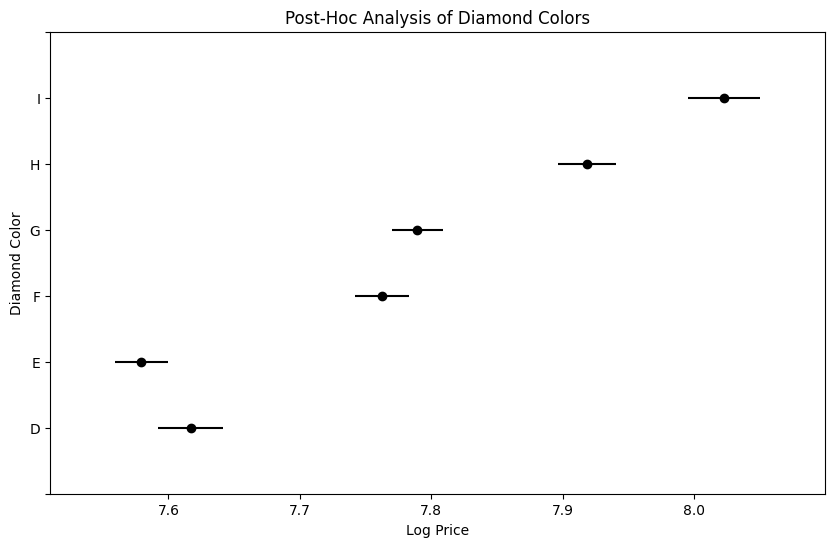

In [16]:

# #Load and preprocess the dataset
def load_and_preprocess():
    diamonds = sns.load_dataset("diamonds")
    diamonds = diamonds[diamonds['color'].isin(['D', 'E', 'F', 'G', 'H', 'I'])]
    diamonds['log_price'] = np.log(diamonds['price'])
    return diamonds

# Filter data based on cut quality
def filter_data_by_cut(diamonds):
    filtered_diamonds = diamonds[diamonds['cut'].isin(['Ideal', 'Premium', 'Very Good'])]
    return filtered_diamonds

# Run two-way ANOVA
def perform_two_way_anova(diamonds_cut):
    model = ols('log_price ~ C(color) + C(cut) + C(color):C(cut)', data=diamonds_cut).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    return anova_results

# Perform post-hoc analysis
def post_hoc_analysis(diamonds):
    post_hoc_results = pairwise_tukeyhsd(endog=diamonds['log_price'], groups=diamonds['color'], alpha=0.05)
    return post_hoc_results

# Plot post-hoc results
def plot_post_hoc_results(post_hoc_results):
    fig = post_hoc_results.plot_simultaneous()
    plt.title('Post-Hoc Analysis of Diamond Colors')
    plt.xlabel('Log Price')
    plt.ylabel('Diamond Color')
    plt.show()

# Main analysis function
def main():
    diamonds = load_and_preprocess()
    diamonds_cut = filter_data_by_cut(diamonds)
    
    # Perform and print the results of two-way ANOVA
    print("Two-way ANOVA Results:")
    print(perform_two_way_anova(diamonds_cut))
    
    # Perform and print the results of post-hoc analysis
    post_hoc_results = post_hoc_analysis(diamonds)
    print("Post-Hoc Analysis Results:")
    print(post_hoc_results.summary())
    
    # Plot post-hoc results
    plot_post_hoc_results(post_hoc_results)
    
if __name__ == "__main__":
    main()

### ANOVA Analysis: Diamond Pricing by Color and Cut

In this analysis, I conducted a two-way ANOVA followed by post-hoc Tukey HSD tests to investigate the influence of color and cut on the log prices of diamonds. This statistical examination revealed significant interactions between these factors, emphasizing their combined effect on pricing.

Findings:

- Interaction Effect: The significant p-value from the interaction between color and cut indicates that the combined effects of these attributes are crucial in determining diamond prices.
- Post-Hoc Insights: Specific color comparisons, such as diamonds of color D compared to F, G, H, and I, showed significant differences in log prices. These insights are valuable for precision in pricing and inventory strategies.

- Data-Driven Decisions: The insights from this analysis can assist in making informed decisions about pricing, inventory and marketing strategies based on the statistical significance of color and cut combinations.

#### Key Topics Addressed by ANOVA

- Color's Impact on Price: Does the color of a diamond significantly influence its price when the cut quality is accounted for? This question explores the intrinsic value added by color variations in the market perception of diamonds.

- Cut Quality Influence: How does the quality of the cut impact the price independently of color? This addresses the craftsmanship aspect of diamond processing and its effect on pricing.

- Interaction Effects: Is there a significant interaction effect between color and cut on diamond prices? This examines whether the combined effect of color and cut is greater than the sum of their individual effects, which can indicate complex consumer preferences in the market.

### Conclusion and Real-Case Application
The analyses show that both color and cut significantly affect diamond prices, with notable interaction effects. This indicates that certain combinations of color and cut are more valued than others.

